# Apprentissage Supervisé avec Sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## 1. Régression

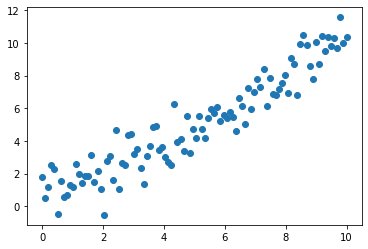

In [2]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.scatter(X, y)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression() #on parle d'estimateur et on précise alors ses hyperparamètres
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.8881140743377214

In [5]:
predictions=model.predict(X)

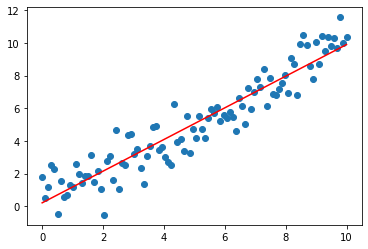

In [6]:
plt.scatter(X, y)
plt.plot(X,predictions,c='r')

In [7]:
model.get_params(True)
model.set_params()

LinearRegression()

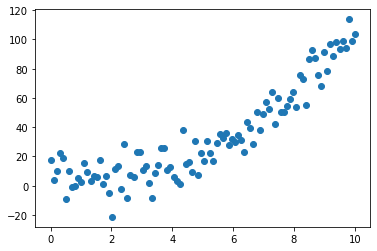

In [8]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1)
y = X**2 + 10*np.random.randn(m,1)

plt.scatter(X, y)

In [9]:
model = LinearRegression() #on parle d'estimateur et on précise alors ses hyperparamètres
model.fit(X, y) # entrainement du modele
model.score(X, y) # évaluation avec le coefficient de corrélation

0.7855276854537206

In [10]:
predictions=model.predict(X)

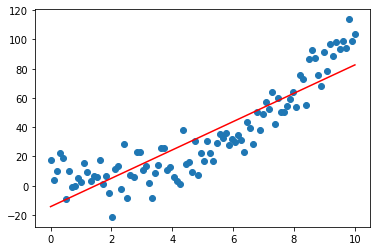

In [11]:
plt.scatter(X, y)
plt.plot(X,predictions,c='r')

In [12]:
 from sklearn.svm import SVR #modèle de Support Vector Machine
 model2=SVR(C=100)
 model2.fit(X,y)
 model2.score(X,y)

0.916152384089585

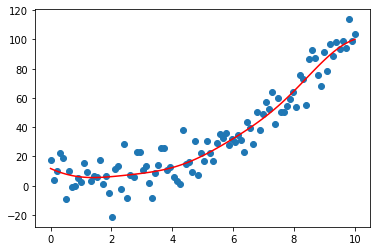

In [13]:
plt.scatter(X, y)
plt.plot(X, model2.predict(X), c='red')

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
mean_squared_error(X,model2.predict(X),squared=False)

40.040678279211996

In [16]:
mean_absolute_error(X,model2.predict(X))

28.91899820058291

## 2. Classification

In [17]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


### a -  une bibliothèque intéressante pour représenter les données pandas : Pandas Profiling

Pour son installation, dans un terminal : 

1 - installer les notebook extensions de Jupyter : conda install -c conda-forge jupyter_nbextenions_configurator

2 - installer la bilbiothèque : conda install -c conda-forge pandas-profiling

3 - activer l'extension : jupyter nbextenion enable --py widgetsnbextension

In [18]:
from pandas_profiling import ProfileReport

In [19]:
profile = profile = ProfileReport(titanic, title="Pandas Profiling Report", explorative=True)


In [20]:
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
from sklearn.neighbors import KNeighborsClassifier #K plus proche voisin

In [22]:
model3 = KNeighborsClassifier(n_neighbors=5) 
#essayez avec d'autres valeur de n_neighbors qui est un hyperparamètre

In [23]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [24]:
model3.fit(X, y) # entrainement du modele
model3.score(X, y) # évaluation

0.8417366946778712

### b. Prediction de survie

In [25]:
def survie(model, pclass=1, sex=1, age=23):
  x = np.array([pclass, sex, age]).reshape(1, 3)
  print(model.predict(x))
  print(model.predict_proba(x)) #cette fonction n'existe pas pour tout les estimateurs attention

In [26]:
survie(model3)

[1]
[[0. 1.]]


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(y,model3.predict(X)))

[[388  36]
 [ 77 213]]


In [29]:
(375+219)/(375+49+71+219)

0.8319327731092437

## 3. Exercice pour plus tard
Écrire un code qui permet de trouver la meilleure valeur de voisin n_neighbors pour le modele de KNeighborsClassifier.

Dans sklearn, il est possible de faire cela avec la classe GridSearchCV. Mais il peut également etre utile de savoir écrire soi-meme ce genre de code de recherche.

3


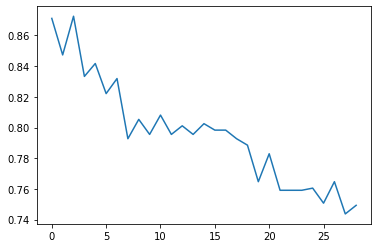

In [30]:
# SOLUTION
score = []
best_k = 1
best_score = 0

for k in range(best_k, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    score.append(model.score(X, y))
    
    if best_score < model.score(X, y):
        best_k = k
        best_score = model.score(X, y)

print(best_k)
plt.plot(score)